# Broken Timeline Plot Gallery

The broken timeline plot is used for visualizing data availability across categories over time, showing periods where data is available as horizontal bars, with gaps indicating missing data periods.

Broken timeline plots excel at:
- **Data Quality Assessment**: Visualize data availability gaps across categories/segments over time
- **Product Availability Analysis**: Identify periods with stock outs by store/category
- **Seasonality Analysis**: Assess periods of low sales that may indicate seasonality or other trends
- **Gap Analysis**: Quickly identify missing data patterns across multiple categories

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from pyretailscience.plots import broken_timeline

## Basic Broken Timeline Plot

Visualize data availability across multiple stores over time, showing continuous periods and gaps.

---

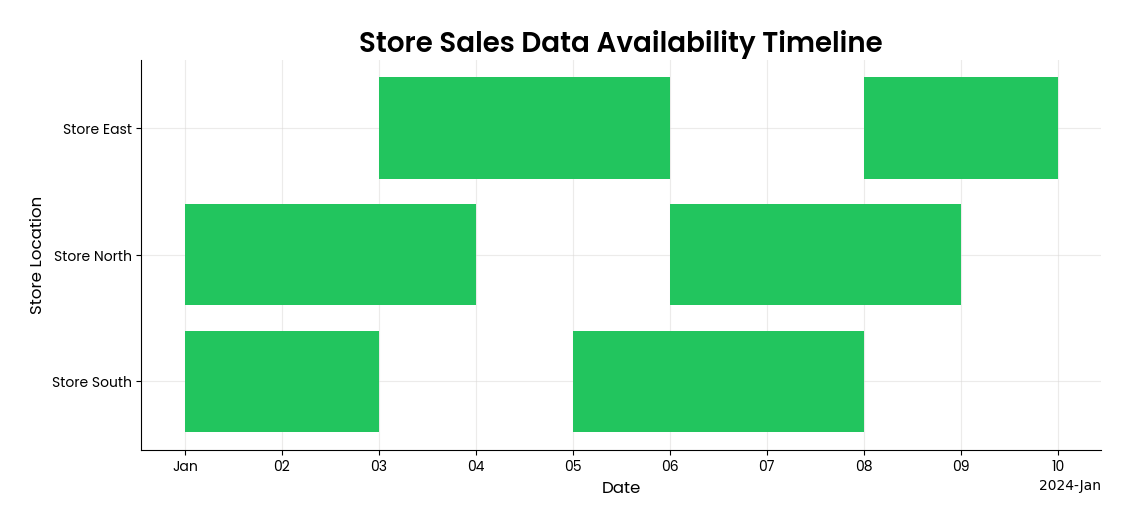

In [ ]:
# Create sample store sales data with gaps
store_sales_data = pd.DataFrame(
    {
        "transaction_date": pd.to_datetime(
            [
                "2024-01-01",
                "2024-01-02",
                "2024-01-03",  # Store A: continuous start
                "2024-01-06",
                "2024-01-07",
                "2024-01-08",  # Store A: gap then continues
                "2024-01-01",
                "2024-01-02",  # Store B: shorter period
                "2024-01-05",
                "2024-01-06",
                "2024-01-07",  # Store B: gap then continues
                "2024-01-03",
                "2024-01-04",
                "2024-01-05",  # Store C: different pattern
                "2024-01-08",
                "2024-01-09",  # Store C: gap then continues
            ],
        ),
        "store_id": [
            "Store North",
            "Store North",
            "Store North",
            "Store North",
            "Store North",
            "Store North",
            "Store South",
            "Store South",
            "Store South",
            "Store South",
            "Store South",
            "Store East",
            "Store East",
            "Store East",
            "Store East",
            "Store East",
        ],
        "sales_amount": [1200, 1350, 1180, 1420, 1580, 1650, 980, 1100, 1240, 1380, 1290, 850, 920, 1050, 1180, 1120],
    },
)

ax = broken_timeline.plot(
    store_sales_data,
    category_col="store_id",
    value_col="sales_amount",
    title="Store Sales Data Availability Timeline",
    x_label="Date",
    y_label="Store Location",
)
plt.show()

## Weekly Period Aggregation

Aggregate data by weeks instead of days using the `period` parameter for longer time ranges.

---

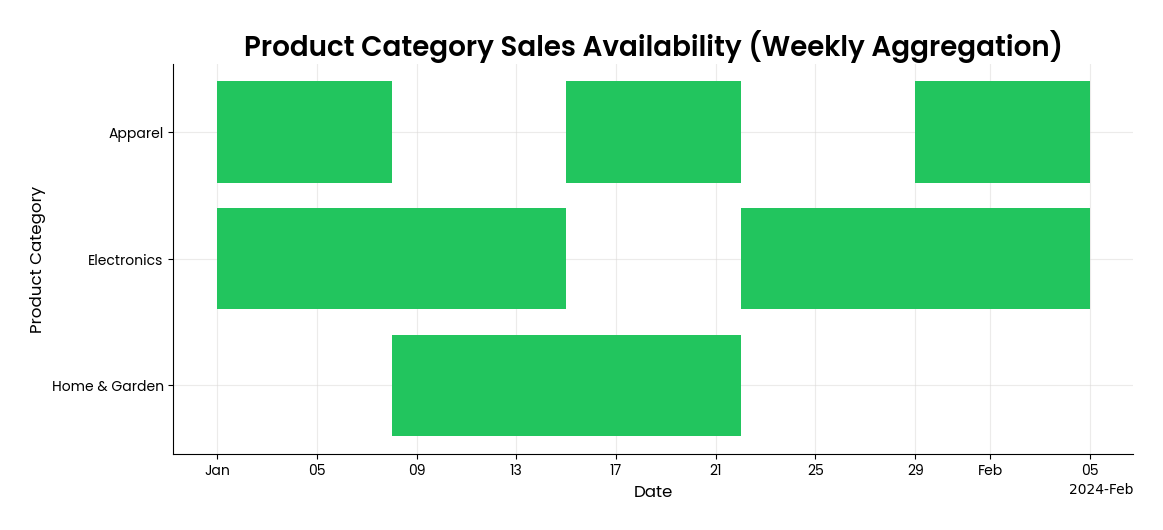

In [ ]:
# Create sample data spanning multiple weeks
weekly_sales_data = pd.DataFrame(
    {
        "transaction_date": pd.to_datetime(
            [
                "2024-01-01",
                "2024-01-03",
                "2024-01-08",
                "2024-01-10",  # Product A: weeks 1-2
                "2024-01-22",
                "2024-01-24",
                "2024-01-29",
                "2024-01-31",  # Product A: weeks 4-5
                "2024-01-01",
                "2024-01-02",
                "2024-01-15",
                "2024-01-16",  # Product B: weeks 1,3
                "2024-01-29",
                "2024-01-30",  # Product B: week 5
                "2024-01-08",
                "2024-01-09",
                "2024-01-15",
                "2024-01-17",  # Product C: weeks 2,3
            ],
        ),
        "product_category": ["Electronics"] * 8 + ["Apparel"] * 6 + ["Home & Garden"] * 4,
        "weekly_sales": [
            5200,
            4800,
            6100,
            5800,
            7200,
            6900,
            8100,
            7800,
            3200,
            3500,
            4100,
            3800,
            4500,
            4200,
            2800,
            3100,
            3400,
            3200,
        ],
    },
)

ax = broken_timeline.plot(
    weekly_sales_data,
    category_col="product_category",
    value_col="weekly_sales",
    title="Product Category Sales Availability (Weekly Aggregation)",
    x_label="Date",
    y_label="Product Category",
    period="W",
)
plt.show()

## Threshold Filtering

Filter out periods with values below a threshold to focus on significant sales periods only.

---

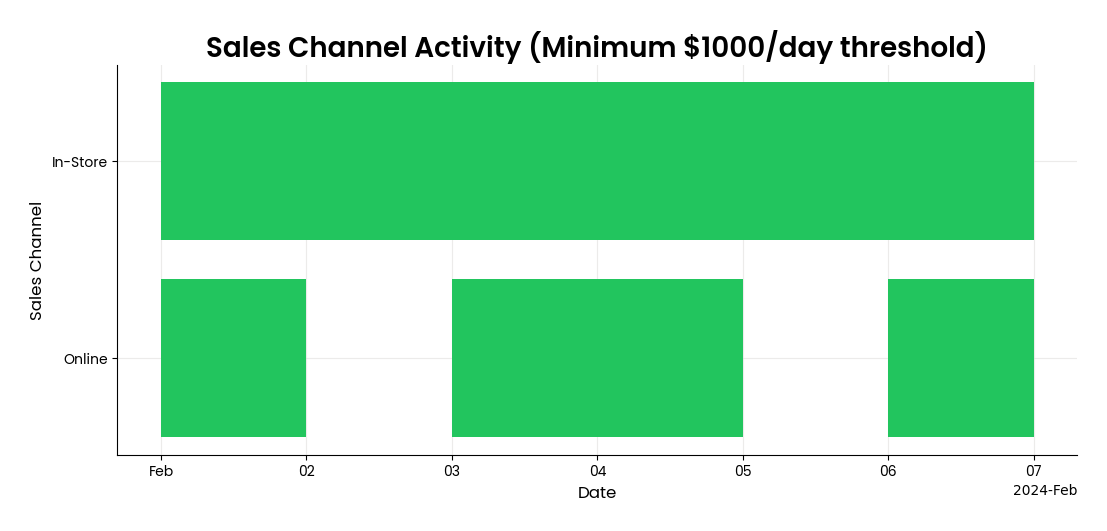

In [ ]:
# Create sample data with varying sales amounts
threshold_data = pd.DataFrame(
    {
        "transaction_date": pd.to_datetime(
            [
                "2024-02-01",
                "2024-02-02",
                "2024-02-03",
                "2024-02-04",
                "2024-02-05",
                "2024-02-06",
                "2024-02-01",
                "2024-02-02",
                "2024-02-03",
                "2024-02-04",
                "2024-02-05",
                "2024-02-06",
                "2024-02-01",
                "2024-02-02",
                "2024-02-03",
                "2024-02-04",
                "2024-02-05",
                "2024-02-06",
            ],
        ),
        "sales_channel": ["Online"] * 6 + ["In-Store"] * 6 + ["Phone Orders"] * 6,
        "daily_revenue": [
            2500,
            180,
            2800,
            3200,
            120,
            2900,  # Online: low sales on days 2,5
            4500,
            4200,
            4800,
            5100,
            4700,
            4900,  # In-Store: consistently high
            150,
            180,
            220,
            190,
            160,
            140,
        ],  # Phone: consistently low
    },
)

ax = broken_timeline.plot(
    threshold_data,
    category_col="sales_channel",
    value_col="daily_revenue",
    title="Sales Channel Activity (Minimum $1000/day threshold)",
    x_label="Date",
    y_label="Sales Channel",
    threshold_value=1000,
)
plt.show()

## Custom Aggregation Function

Use different aggregation functions like 'mean' or 'max' instead of the default 'sum'.

---

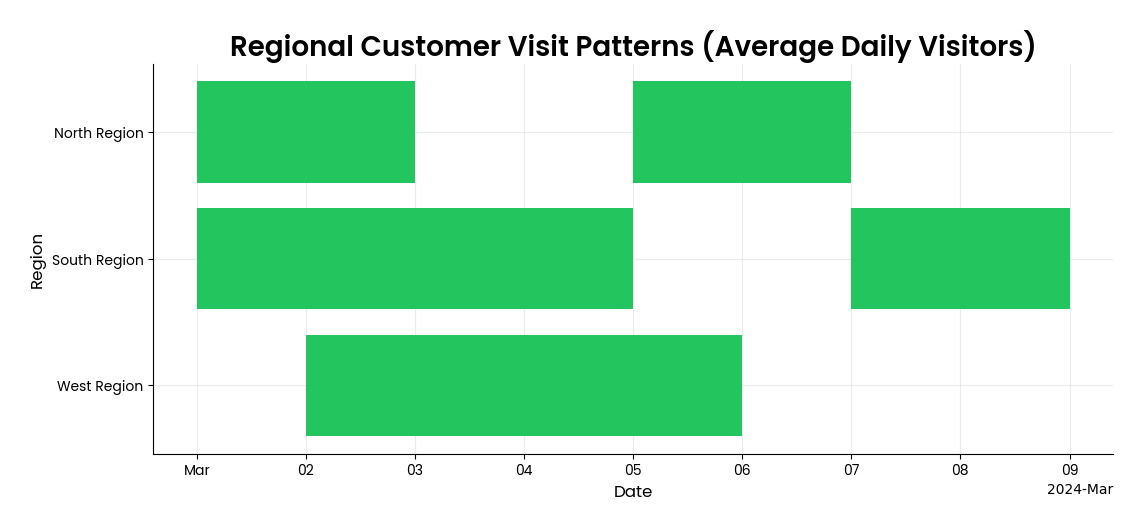

In [ ]:
# Create sample customer visit data
customer_visits = pd.DataFrame(
    {
        "transaction_date": pd.to_datetime(
            [
                "2024-03-01",
                "2024-03-01",
                "2024-03-02",
                "2024-03-02",
                "2024-03-02",  # Region A
                "2024-03-05",
                "2024-03-06",
                "2024-03-06",  # Region A
                "2024-03-01",
                "2024-03-02",
                "2024-03-03",
                "2024-03-04",  # Region B
                "2024-03-07",
                "2024-03-08",  # Region B
                "2024-03-02",
                "2024-03-03",
                "2024-03-04",
                "2024-03-05",  # Region C
            ],
        ),
        "region": ["North Region"] * 8 + ["South Region"] * 6 + ["West Region"] * 4,
        "daily_visitors": [450, 380, 520, 490, 410, 360, 480, 440, 380, 420, 390, 450, 480, 390, 320, 350, 380, 340],
    },
)

ax = broken_timeline.plot(
    customer_visits,
    category_col="region",
    value_col="daily_visitors",
    title="Regional Customer Visit Patterns (Average Daily Visitors)",
    x_label="Date",
    y_label="Region",
    agg_func="mean",
)
plt.show()

## Data Quality Assessment

Identify data quality issues by visualizing missing data patterns across different data sources.

---

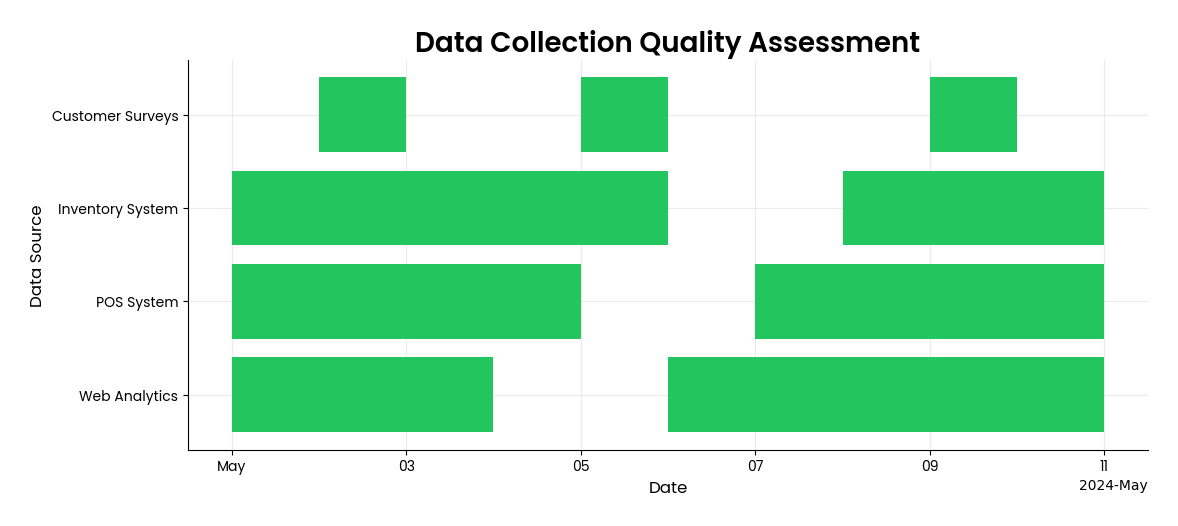

In [ ]:
# Create sample data with realistic gaps representing data quality issues
data_quality = pd.DataFrame(
    {
        "transaction_date": pd.to_datetime(
            [
                # Point of Sale System: mostly reliable with occasional outages
                "2024-05-01",
                "2024-05-02",
                "2024-05-03",
                "2024-05-04",
                "2024-05-07",
                "2024-05-08",
                "2024-05-09",
                "2024-05-10",
                # Web Analytics: consistent but misses weekends
                "2024-05-01",
                "2024-05-02",
                "2024-05-03",
                "2024-05-06",
                "2024-05-07",
                "2024-05-08",
                "2024-05-09",
                "2024-05-10",
                # Customer Survey: sporadic collection
                "2024-05-02",
                "2024-05-05",
                "2024-05-09",
                # Inventory System: daily except system maintenance
                "2024-05-01",
                "2024-05-02",
                "2024-05-03",
                "2024-05-04",
                "2024-05-05",
                "2024-05-08",
                "2024-05-09",
                "2024-05-10",
            ],
        ),
        "data_source": (
            ["POS System"] * 8 + ["Web Analytics"] * 8 + ["Customer Surveys"] * 3 + ["Inventory System"] * 8
        ),
        "record_count": [
            1250,
            1180,
            1340,
            1290,
            1420,
            1380,
            1310,
            1390,
            890,
            920,
            850,
            980,
            1050,
            970,
            940,
            1020,
            45,
            38,
            52,
            340,
            355,
            330,
            348,
            365,
            352,
            338,
            360,
        ],
    },
)

ax = broken_timeline.plot(
    data_quality,
    category_col="data_source",
    value_col="record_count",
    title="Data Collection Quality Assessment",
    x_label="Date",
    y_label="Data Source",
)
plt.show()

## Advanced Styling Options

Customize the appearance with source attribution, bar height, transparency, and edge styling.

---

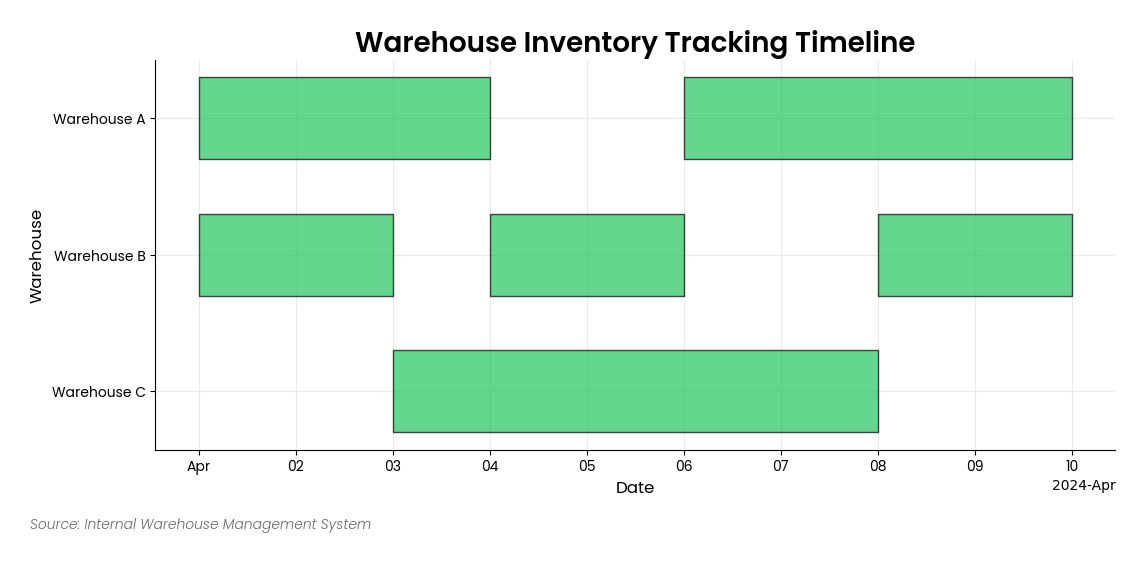

In [ ]:
# Create sample inventory data
inventory_data = pd.DataFrame(
    {
        "transaction_date": pd.to_datetime(
            [
                "2024-04-01",
                "2024-04-02",
                "2024-04-03",  # Warehouse A
                "2024-04-06",
                "2024-04-07",
                "2024-04-08",
                "2024-04-09",  # Warehouse A
                "2024-04-01",
                "2024-04-02",
                "2024-04-04",
                "2024-04-05",  # Warehouse B
                "2024-04-08",
                "2024-04-09",  # Warehouse B
                "2024-04-03",
                "2024-04-04",
                "2024-04-05",
                "2024-04-06",
                "2024-04-07",  # Warehouse C
            ],
        ),
        "warehouse": ["Warehouse A"] * 7 + ["Warehouse B"] * 6 + ["Warehouse C"] * 5,
        "inventory_level": [
            2500,
            2300,
            2100,
            2800,
            2600,
            2400,
            2200,
            1800,
            1650,
            1900,
            2050,
            1750,
            1600,
            3200,
            3100,
            2900,
            3400,
            3300,
        ],
    },
)

ax = broken_timeline.plot(
    inventory_data,
    category_col="warehouse",
    value_col="inventory_level",
    title="Warehouse Inventory Tracking Timeline",
    x_label="Date",
    y_label="Warehouse",
    bar_height=0.6,
    alpha=0.7,
    edgecolors="black",
    linewidth=1,
    source_text="Source: Internal Warehouse Management System",
)
plt.show()

## Seasonal Sales Pattern Analysis

Analyze seasonal patterns by filtering out low-sales periods to focus on active selling seasons.

---

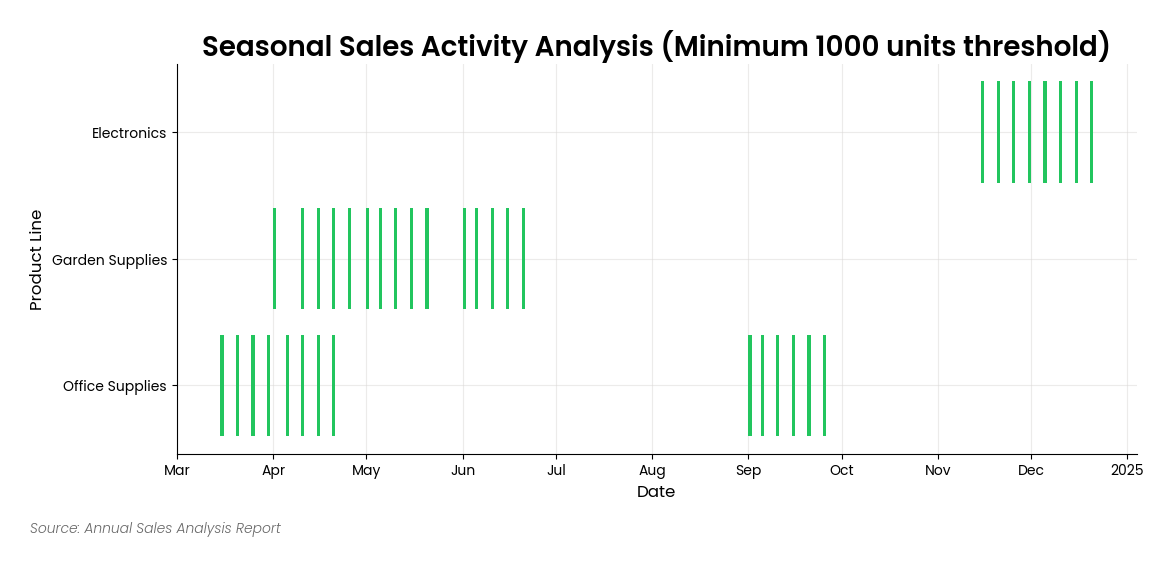

In [ ]:
# Create sample seasonal data with clear patterns
seasonal_data = pd.DataFrame(
    {
        "transaction_date": pd.to_datetime(
            [
                # Office Supplies: Spring season (active)
                "2024-03-15",
                "2024-03-20",
                "2024-03-25",
                "2024-03-30",
                "2024-04-05",
                "2024-04-10",
                "2024-04-15",
                "2024-04-20",
                # Summer gap (vacation season)
                "2024-07-20",
                "2024-07-25",
                # Fall season (back to school/work)
                "2024-09-01",
                "2024-09-05",
                "2024-09-10",
                "2024-09-15",
                "2024-09-20",
                "2024-09-25",
                # Electronics: strong holiday season
                "2024-11-15",
                "2024-11-20",
                "2024-11-25",
                "2024-11-30",
                "2024-12-05",
                "2024-12-10",
                "2024-12-15",
                "2024-12-20",
                # Low season
                "2024-02-01",
                "2024-02-15",
                "2024-08-10",
                "2024-08-20",
                # Garden supplies: spring/summer focused
                "2024-04-01",
                "2024-04-10",
                "2024-04-15",
                "2024-04-20",
                "2024-04-25",
                "2024-05-01",
                "2024-05-05",
                "2024-05-10",
                "2024-05-15",
                "2024-05-20",
                "2024-06-01",
                "2024-06-05",
                "2024-06-10",
                "2024-06-15",
                "2024-06-20",
            ],
        ),
        "product_line": [
            *["Office Supplies"] * 16,
            *["Electronics"] * 12,
            *["Garden Supplies"] * 15,
        ],
        "sales_volume": [
            # Office Supplies: consistent spring/fall
            *[1800, 1900, 2100, 2000, 2200, 2050, 1950, 2100, 800, 750, 1850, 1950, 2000, 1900, 2050, 1800],
            # Electronics: holiday peak
            *[3200, 3500, 3800, 3600, 3900, 4100, 3700, 3400, 600, 580, 650, 620],
            # Garden supplies: spring/summer
            *[1200, 1400, 1350, 1500, 1450, 1600, 1550, 1650, 1700, 1580, 1400, 1350, 1300, 1250, 1200],
        ],
    },
)

ax = broken_timeline.plot(
    seasonal_data,
    category_col="product_line",
    value_col="sales_volume",
    title="Seasonal Sales Activity Analysis (Minimum 1000 units threshold)",
    x_label="Date",
    y_label="Product Line",
    threshold_value=1000,
    source_text="Source: Annual Sales Analysis Report",
)
plt.show()